# Airbnb in Athens

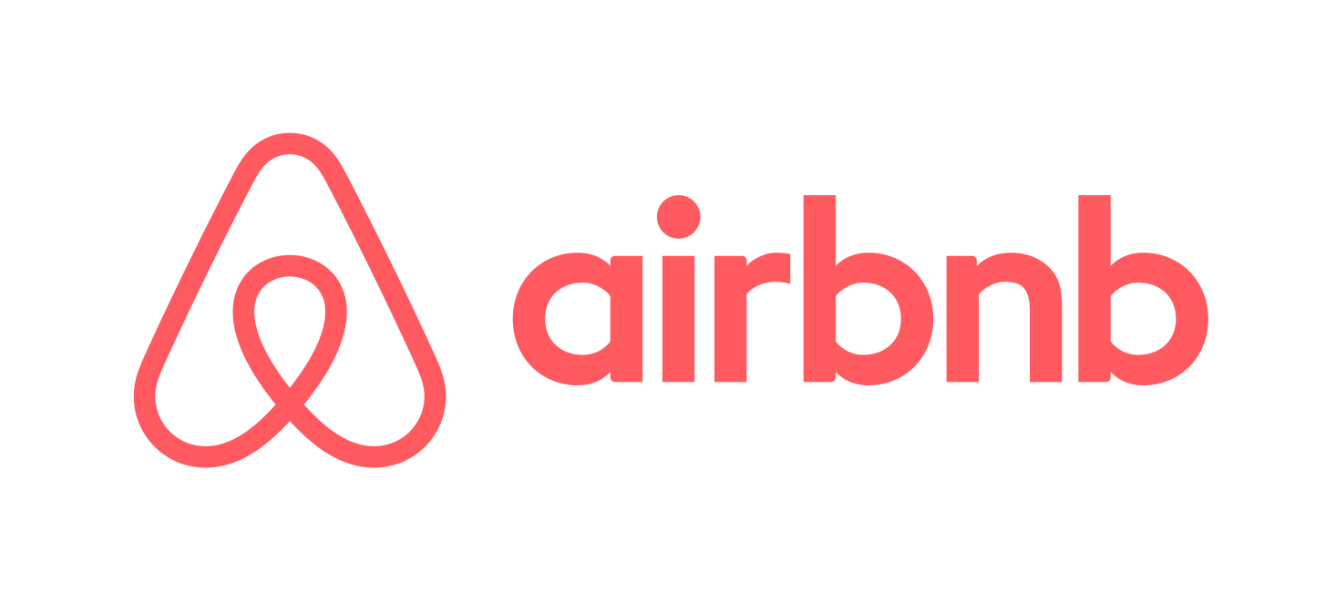

In [1]:
import pandas as pd
import plotly.express as px
from dash.dependencies import Input, Output
from dash import Dash, dash_table
from dash import dcc
import folium
import dash_bootstrap_components as dbc
import dash_html_components as html
import plotly.graph_objects as go
from folium.plugins import HeatMap
import re
from tqdm import tqdm
from wordcloud import WordCloud
import base64
from io import BytesIO

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\2097525296.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
df = pd.read_csv('athens.csv')

# Airbnb in Athens

## EDA

In [3]:
df.head()

id                                      listing_url  \
0            40042598            https://www.airbnb.com/rooms/40042598   
1            39069205            https://www.airbnb.com/rooms/39069205   
2  653274914834812593  https://www.airbnb.com/rooms/653274914834812593   
3            54361219            https://www.airbnb.com/rooms/54361219   
4            51258073            https://www.airbnb.com/rooms/51258073   

        scrape_id last_scraped           source  \
0  20231225075512   2023-12-26  previous scrape   
1  20231225075512   2023-12-26  previous scrape   
2  20231225075512   2023-12-26      city scrape   
3  20231225075512   2023-12-26      city scrape   
4  20231225075512   2023-12-26      city scrape   

                                                name  description  \
0  Rental unit in Athina · 1 bedroom · 1 bed · 1 ...          NaN   
1  Rental unit in Athina · 2 bedrooms · 2 beds · ...          NaN   
2  Condo in Athina · ★5.0 · 1 bedroom · 2 beds · ...          NaN   
3  Rental unit in Athina · ★4.75 · 1 bedroom · 1 ...          NaN   
4  Rental unit in Athina · ★5.0 · Studio · 3 beds...          NaN   

                               neighborhood_overview  \
0                                                NaN   
1  Is located in one of the hottest spots in Kolo...   
2  Η γειτονιά βρίσκεται μια ανάσα από τον Παρθενώ...   
3                                                NaN   
4                                                NaN   

                                         picture_url    host_id  ...  \
0  https://a0.muscache.com/pictures/fb6d0257-52ec...  158884228  ...   
1  https://a0.muscache.com/pictures/8965800b-9101...  299446668  ...   
2  https://a0.muscache.com/pictures/b8926124-f861...  272702874  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...  433120301  ...   
4  https://a0.muscache.com/pictures/2e0592af-8983...  199937958  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                         NaN                    NaN                 NaN   
2                         5.0                   4.98                4.96   
3                         5.0                   4.98                4.83   
4                         5.0                   5.00                5.00   

       license instant_bookable calculated_host_listings_count  \
0          NaN                f                              1   
1          NaN                f                              1   
2  00001652202                t                              1   
3  00001402443                t                              1   
4  00002160731                f                              3   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           3   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0               NaN  
2                                           0              2.68  
3                                           0              1.83  
4                                           0              0.31  

[5 rows x 75 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13182 entries, 0 to 13181
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            13182 non-null  int64  
 1   listing_url                                   13182 non-null  object 
 2   scrape_id                                     13182 non-null  int64  
 3   last_scraped                                  13182 non-null  object 
 4   source                                        13182 non-null  object 
 5   name                                          13182 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         8126 non-null   object 
 8   picture_url                                   13182 non-null  object 
 9   host_id                                       13182 non-null 

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
columnstodrop = ['scrape_id','last_scraped','source','description','picture_url','host_url','host_location','host_about','host_acceptance_rate','host_is_superhost','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','neighbourhood_group_cleansed','bathrooms_text', 'amenities','minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','has_availability','availability_30','availability_60','availability_90','calendar_last_scraped','number_of_reviews_l30d','first_review','last_review','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','instant_bookable','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','host_response_time','host_response_rate','bathrooms','bedrooms']

In [7]:
df.drop(columns = columnstodrop,inplace = True)

In [8]:
df['price'] = df['price'].str.replace('$','')

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\221282035.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','')


In [9]:
df['price'] = df['price'].str.replace(',','')

In [10]:
df['price'] = pd.to_numeric(df['price'])

## Dash (Listings - Hosts in Athens)

Pie plot in Room type

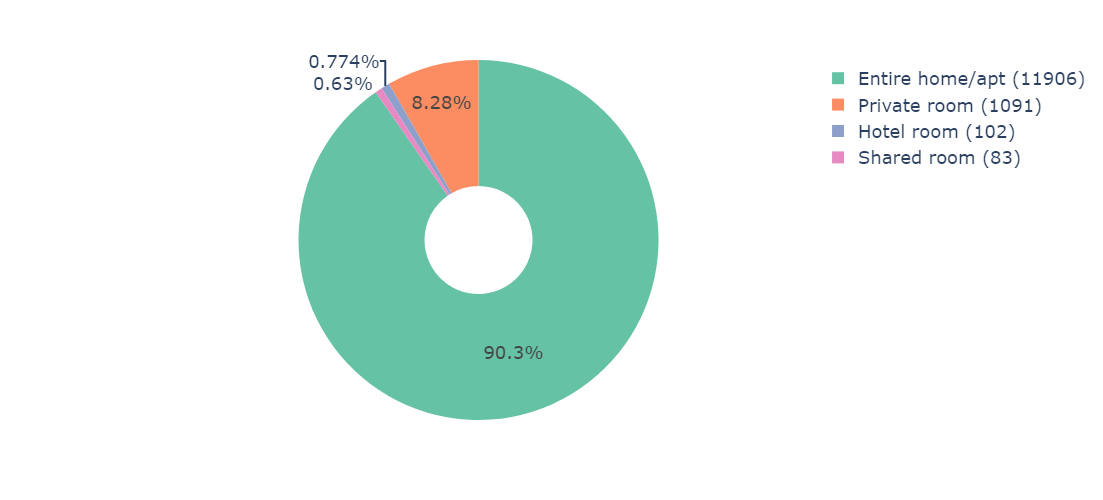

In [11]:
dft = df.groupby('room_type').count()['id'].sort_values(ascending = False).reset_index(name = 'count')
dft['rt'] = dft['room_type'] + ' (' + dft['count'].astype(str) + ')'
figtype = px.pie(dft, 
                 values='count', 
                 names="rt",
                 color_discrete_sequence=px.colors.qualitative.Set2,
                 hole=.3)
figtype = figtype.update_layout(width=700, height=500,font=dict(
        size=18,
    ))
figtype.show()

How many of the hosts have 3 or more properties

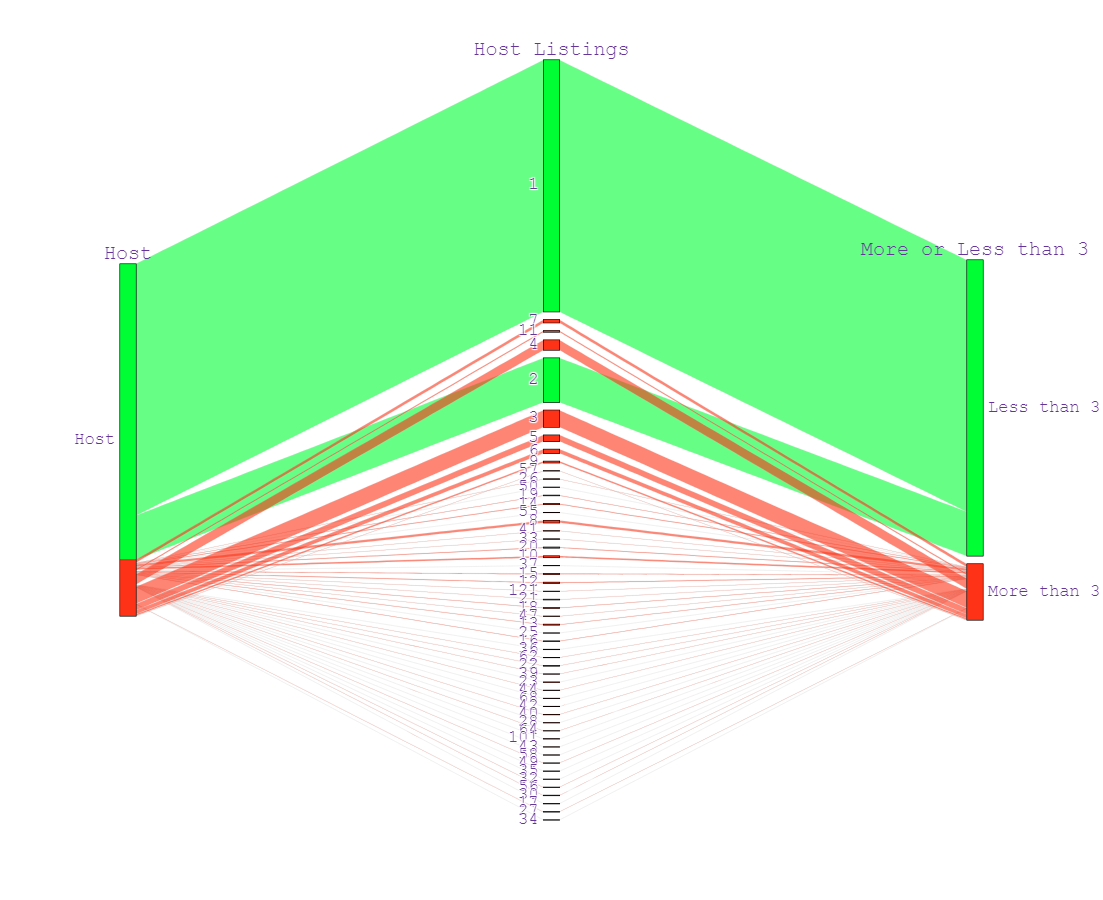

In [12]:
dfo = df.groupby('host_id')['calculated_host_listings_count'].mean().reset_index()
dfo['More or Less than 3'] = list(map(lambda x: x>=3 ,dfo['calculated_host_listings_count']))
dfo['More or Less than 3'] = dfo['More or Less than 3'].replace(False,'Less than 3 properties').replace(True,'More than 3 properties')
dfo['More or Less than 3'] = dfo['More or Less than 3'].astype('category')
dfo['calculated_host_listings_count'] = dfo['calculated_host_listings_count'].astype('category')
dfo['host_id'] = 'Host'
dfo.rename(columns = {'host_id':'Host','calculated_host_listings_count':'Host Listings'},inplace = True)
figa = px.parallel_categories(
    dfo,
    dimensions=dfo.columns,
    color=dfo["More or Less than 3"].map(
        {
            l: px.colors.qualitative.Light24[i % len(px.colors.qualitative.Light24)]
            for i, l in enumerate(dfo["More or Less than 3"].unique()[::-1])
        }
    ),
    height = 900, 
    width= 900
)
figa.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    ))

Listings per hosts (More and Less than 3 properties)

In [13]:
dfa = df.copy()
dfa['More or Less than 3'] = list(map(lambda x: x>=3 ,dfa['calculated_host_listings_count']))
dfa['More or Less than 3'] = dfa['More or Less than 3'].replace(False,'Less than 3 properties').replace(True,'More than 3 properties')
dfa = dfa.groupby('More or Less than 3').agg({'host_id':'nunique','id':'count'})
dfa.rename({'host_id':'Number of Hosts','id':'Number of Listings'},axis = 1,inplace = True)

In [14]:
dfa

Number of Hosts  Number of Listings
More or Less than 3                                        
Less than 3 properties             4910                5643
More than 3 properties              930                7539

In [15]:
dfa['Number of Hosts'] = dfa['Number of Hosts'].apply(lambda x: 100 * x / dfa['Number of Hosts'].sum())
dfa['Number of Listings'] = dfa['Number of Listings'].apply(lambda x: 100 * x / dfa['Number of Listings'].sum())

In [16]:
dfa = dfa.T

In [17]:
dfa

More or Less than 3  Less than 3 properties  More than 3 properties
Number of Hosts                   84.075342               15.924658
Number of Listings                42.808375               57.191625

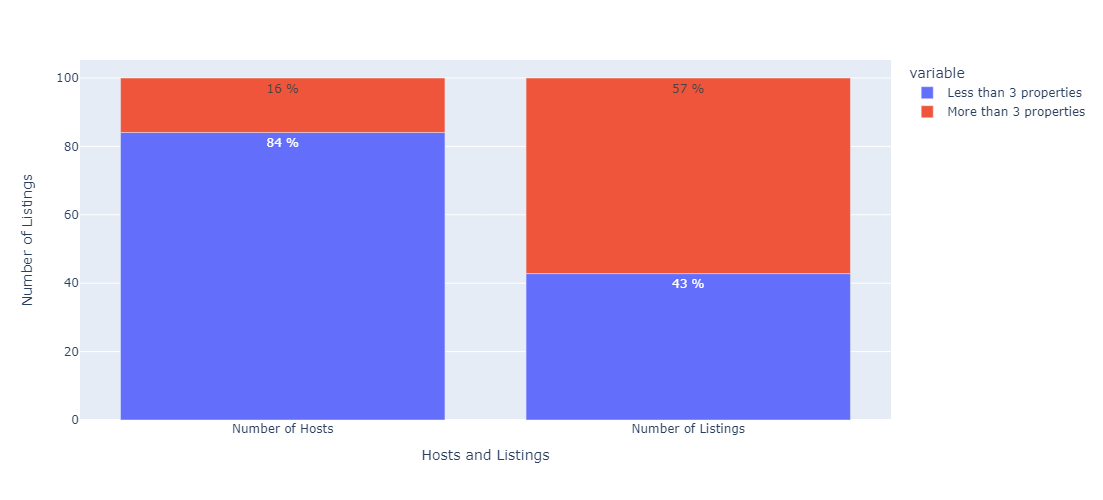

In [18]:
fignew = px.bar(dfa, x=dfa.index, y=['Less than 3 properties','More than 3 properties'], text_auto='.2s',
               width = 700,height = 500,labels={'index':'Hosts and Listings','value':'Number of Listings'})
fignew.for_each_trace(lambda t: t.update(texttemplate = t.texttemplate + ' %'))
fignew.show()

Top Hosts

In [19]:
dfh = df.groupby('host_name').count()['id'].sort_values(ascending = False).reset_index(name = 'Properties')

In [20]:
dfh1 = dfh.head(20)

In [21]:
dfh1.loc[21,'Properties'] = dfh['Properties'].sum() - dfh1['Properties'].sum()
dfh1.loc[21,'host_name'] = 'All Others'

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\1313366785.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
dfh1

host_name  Properties
0         George       234.0
1          Maria       184.0
2   Konstantinos       176.0
3       Dimitris       175.0
4        Ioannis       145.0
5       Upstreet       121.0
6          Nikos       117.0
7            Mgv       101.0
8     Panagiotis        96.0
9       Christos        91.0
10         Eleni        86.0
11    Alexandros        74.0
12         Harry        73.0
13      Nikolaos        72.0
14      Georgios        71.0
15      Katerina        70.0
16         Nasos        68.0
17   Evan&Anetta        68.0
18          Anna        66.0
19         Chris        66.0
21    All Others     11028.0

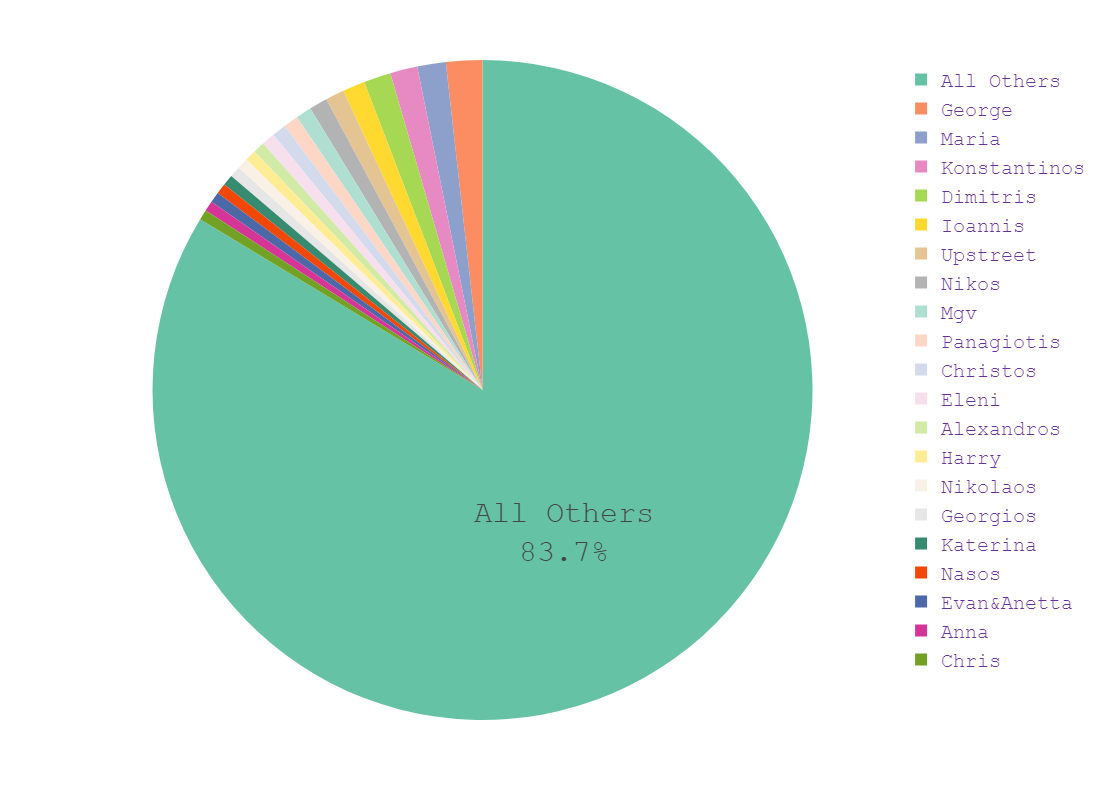

In [23]:
figh1 = px.pie(dfh1, 
                 values='Properties', 
                 names="host_name",
                 color_discrete_sequence=px.colors.qualitative.Set2)
figh1.update_traces(textposition='inside', textinfo='percent+label')
figh1.update_layout(uniformtext_minsize=30, uniformtext_mode='hide')
figh1 = figh1.update_layout(width=700, height=800)
figh1.update_layout(
    font=dict(
        family="Courier New, monospace",
        size=20,
        color="RebeccaPurple"
    ))

Dash

In [24]:
FONT_AWESOME = "https://use.fontawesome.com/releases/v5.10.2/css/all.css"

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, FONT_AWESOME])

card_icon = {
    "color": "white",
    "textAlign": "center",
    "fontSize": 30,
    "margin": "auto",
}

cardlistings = dbc.CardGroup(
    [
        dbc.Card(
            dbc.CardBody(
                [
                    html.H6("Total Athens Listings", className="card-title"),
                    html.H3(len(df['id']), className="card-text",),
                ]
            )
        ),
        dbc.Card(
            html.Div(className="fa fa-home", style=card_icon),
            className="bg-success",
            style={"maxWidth": 75},
        ),
    ],className="mt-4 shadow",
)



app.layout = html.Div([
    html.H1('Athens Listings'),
    dbc.Container(dbc.Row(dbc.Col([cardlistings], md=5))),
    html.H3('Room Type proportion'),
    dcc.Graph(id= 'g1', figure = figtype),
    dcc.Graph(id= 'g2', figure = figa),
    dcc.Graph(id= 'g3', figure = figh1),
    dash_table.DataTable(dfa.to_dict('records'), [{"name": i, "id": i} for i in dfa.columns],
                        style_data={
                        'whiteSpace': 'normal',
                        'height': 'auto',
                        'width': 120
                        },
                        style_as_list_view=True,
                        fill_width=False,
                        style_data_conditional=[
                        {'if': {
                        'filter_query': '{More or Less than 3} = "More than 3 properties"'
                               },
                        'backgroundColor': '#0074D9',
                        'color': 'white'
        }
    ])
])

if __name__ == "__main__":
    app.run_server(debug=True)

## Data Cleaning

Cleaning the datasheet from 
 - The listings that don't have availability
 - The price is mistakenly too high
 - They do not have any reviews the previous 365 days

In [25]:
dfc = df[(df['availability_365']!=0)&(df['price']<2500)&(df['number_of_reviews_ltm']!=0)].reset_index().drop('index',axis = 1)

In [26]:
dfc['priceperbed'] = dfc['price']/dfc['accommodates']

In [27]:
dfc.describe()

id       host_id  host_listings_count  \
count  8.399000e+03  8.399000e+03          8399.000000   
mean   4.063793e+17  2.135958e+08            20.828432   
std    4.205588e+17  1.727213e+08            49.354338   
min    1.059500e+04  1.805000e+03             1.000000   
25%    3.348117e+07  5.727340e+07             2.000000   
50%    5.418802e+07  1.799056e+08             5.000000   
75%    8.485605e+17  3.668934e+08            21.000000   
max    1.047178e+18  5.494154e+08          2444.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                8399.000000  8399.000000  8399.000000   8399.000000   
mean                   31.622574    37.979935    23.731704      3.754376   
std                   100.966935     0.013451     0.012706      1.969470   
min                     1.000000    37.950840    23.701640      1.000000   
25%                     2.000000    37.968820    23.723800      2.000000   
50%                     6.000000    37.978450    23.729610      4.000000   
75%                    25.000000    37.987991    23.737845      4.000000   
max                  5529.000000    38.030830    23.780220     16.000000   

              beds        price  availability_365  number_of_reviews  \
count  8303.000000  8399.000000       8399.000000        8399.000000   
mean      2.097555    83.248006        265.155971          59.080010   
std       1.425622    75.965512        103.118067          88.276466   
min       1.000000    10.000000          1.000000           1.000000   
25%       1.000000    45.000000        194.000000           6.000000   
50%       2.000000    63.000000        306.000000          22.000000   
75%       3.000000    92.500000        352.000000          73.000000   
max      30.000000  1500.000000        365.000000         890.000000   

       number_of_reviews_ltm  review_scores_rating  review_scores_value  \
count            8399.000000           8399.000000          8399.000000   
mean               17.594237              4.745233             4.709993   
std                20.154320              0.389550             0.402059   
min                 1.000000              1.000000             1.000000   
25%                 3.000000              4.680000             4.660000   
50%                10.000000              4.850000             4.810000   
75%                25.000000              4.970000             4.920000   
max               223.000000              5.000000             5.000000   

       calculated_host_listings_count  priceperbed  
count                     8399.000000  8399.000000  
mean                        12.735683    23.353977  
std                         20.470424    16.467787  
min                          1.000000     2.142857  
25%                          1.000000    14.000000  
50%                          4.000000    19.428571  
75%                         15.000000    27.500000  
max                        121.000000   324.500000

## Dash (Pricing, Reviewing, Profits)

Histogram in price per bed

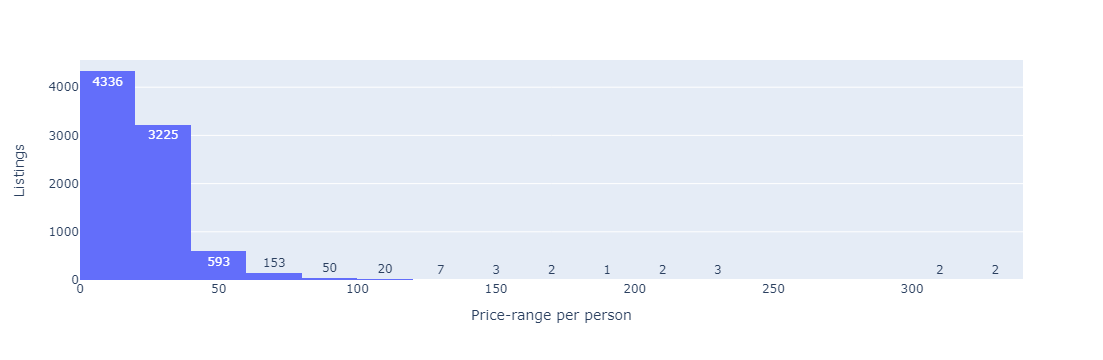

In [28]:
figlist = px.histogram(dfc, x="priceperbed",nbins=20,text_auto=True)
figlist.update_layout(yaxis_title="Listings",xaxis_title='Price-range per person')
figlist.show()

Top 5 and Bottom 5 Locations in Average Price

In [29]:
dfg = dfc.groupby('neighbourhood_cleansed')['priceperbed'].mean().round(2)

In [30]:
topppb = dfg.sort_values(ascending = False).head().reset_index().rename(columns = {'neighbourhood_cleansed':'Neighbourhood','priceperbed':'Average Price per person'})

In [31]:
topppb

Neighbourhood  Average Price per person
0                 ΖΑΠΠΕΙΟ                     41.16
1                ΚΟΛΩΝΑΚΙ                     34.08
2          1Ο ΝΕΚΡΟΤΑΦΕΙΟ                     31.48
3  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                     29.58
4                ΑΚΡΟΠΟΛΗ                     29.04

In [32]:
bottomppb = dfg.sort_values().head().sort_values(ascending = False).reset_index().rename(columns = {'neighbourhood_cleansed':'Neighbourhood','priceperbed':'Average Price per person'})

In [33]:
bottomppb

Neighbourhood  Average Price per person
0        ΑΝΩ ΚΥΨΕΛΗ                     15.52
1   ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                     15.44
2    ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                     14.81
3  ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     13.87
4         ΠΕΝΤΑΓΩΝΟ                     12.54

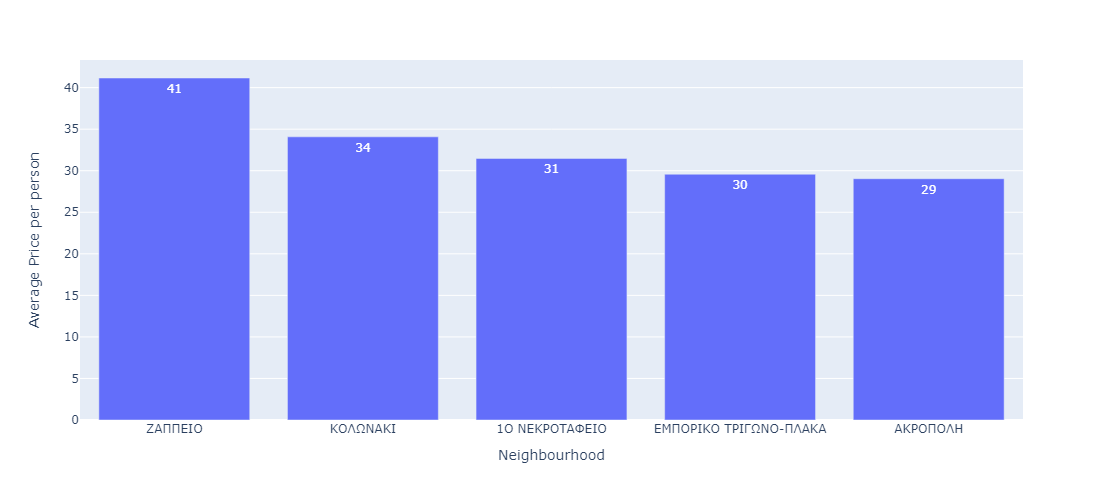

In [34]:
figtop = px.bar(topppb, y='Average Price per person', x='Neighbourhood', text_auto='.2s',
               width = 500,height = 500)
figtop.show()

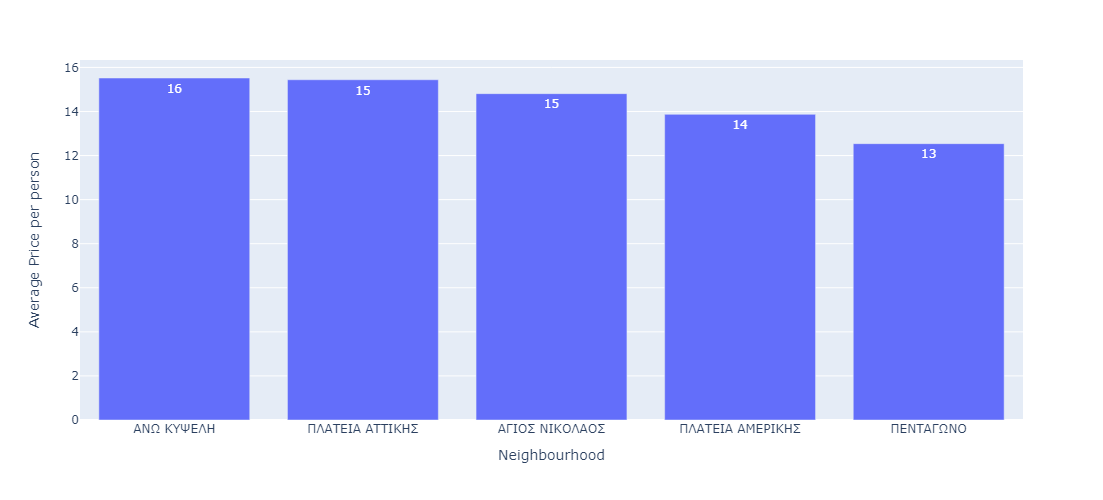

In [35]:
figbot = px.bar(bottomppb, y='Average Price per person', x='Neighbourhood', text_auto='.2s',
               width = 500,height = 500)
figbot.show()

How the price changes vs Rating

In [36]:
dfk = dfc[dfc['neighbourhood_cleansed'].isin(list(dfg.sort_values(ascending = False).head().reset_index()['neighbourhood_cleansed']))]

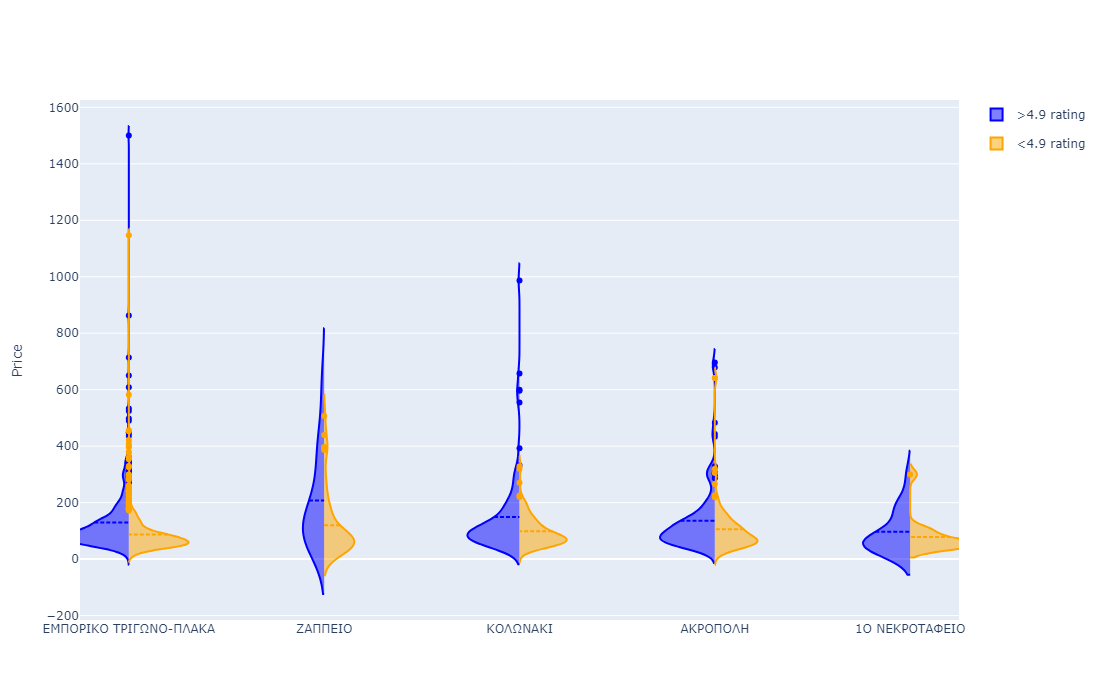

In [37]:
figv = go.Figure()

figv.add_trace(go.Violin(x=dfk['neighbourhood_cleansed'][dfk['review_scores_rating'] > 4.9 ],
                        y=dfk['price'][ dfk['review_scores_rating'] > 4.9 ],
                        legendgroup='Yes', scalegroup='Yes', name='>4.9 rating',
                        side='negative',
                        line_color='blue')
             )
figv.add_trace(go.Violin(x=dfk['neighbourhood_cleansed'][dfk['review_scores_rating'] < 4.9],
                        y=dfk['price'][ dfk['review_scores_rating'] < 4.9 ],
                        legendgroup='No', scalegroup='No', name='<4.9 rating',
                        side='positive',
                        line_color='orange')
             )
figv.update_traces(meanline_visible=True)
figv.update_layout(violingap=0, violinmode='overlay')
figv.update_layout(height = 700)
figv.update_layout(yaxis_title="Price")
figv.show()

Most expensive appartments in most expensive areas

In [38]:
dfz = dfk.groupby(['neighbourhood_cleansed','listing_url']).max('priceperbed')['priceperbed'].round(2)

In [39]:
dftotalmax = dfz.loc[dfz.groupby(level=0).idxmax()].reset_index().sort_values('priceperbed',ascending = False).round(0)

In [40]:
dftotalmax.rename(columns = {'neighbourhood_cleansed':'Neighbourhood','listing_url':'URL','priceperbed':'Price Per Person'},inplace = True)

In [41]:
dftotalmax['Price Per Person'] = dftotalmax['Price Per Person'].astype(str)

In [42]:
dftotalmax['Price Per Person'] = dftotalmax['Price Per Person'] + '$'

In [43]:
dftotalmax

Neighbourhood                                              URL  \
3                 ΖΑΠΠΕΙΟ            https://www.airbnb.com/rooms/45430011   
2  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              https://www.airbnb.com/rooms/800755   
1                ΑΚΡΟΠΟΛΗ            https://www.airbnb.com/rooms/48368803   
4                ΚΟΛΩΝΑΚΙ  https://www.airbnb.com/rooms/654069273325144570   
0          1Ο ΝΕΚΡΟΤΑΦΕΙΟ  https://www.airbnb.com/rooms/828313202639947796   

  Price Per Person  
3           324.0$  
2           145.0$  
1           108.0$  
4           102.0$  
0           100.0$

Average income

In [44]:
# According to Airbnb 70% of the guests leave comments
av_com = 0.7

In [45]:
# According to Airbnb the average stay in Athens is 4.2 days
av_days_spent = 4.2

In [46]:
dfc['totaldaysbooked'] = dfc['number_of_reviews_ltm']*av_days_spent/av_com

In [47]:
dfc['2023income'] = dfc['price']*dfc['totaldaysbooked']

Average income in Athens

In [48]:
dfc['2023income'].mean().round(2)

8784.26

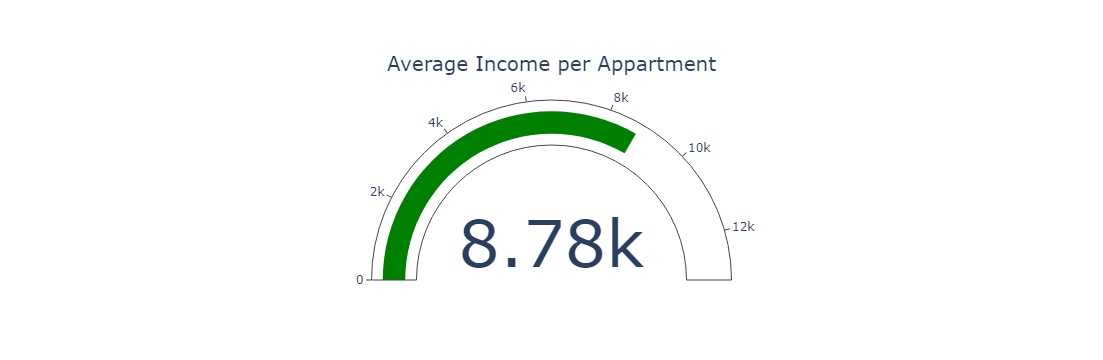

In [49]:
figgauge = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = dfc['2023income'].mean().round(2),
    domain = {'x': [0, 1], 'y': [0, 1]},
    title = {'text': "Average Income per Appartment"}))
figgauge.show()

Total Airbnb market in Athens

In [50]:
"{:,}".format(dfc['2023income'].sum().astype(int))

'73,779,036'

In [51]:
card_icon = {
    "color": "white",
    "textAlign": "center",
    "fontSize": 30,
    "margin": "auto",
}

card2 = dbc.CardGroup(
    [
        dbc.Card(
            dbc.CardBody(
                [
                    html.H6("Total Airbnb market in Athens", className="card-title"),
                    html.H3("{:,}".format(dfc['2023income'].sum().astype(int)), className="card-text",),
                ]
            )
        ),
        dbc.Card(
            html.Div(className="fa fa-home", style=card_icon),
            className="bg-success",
            style={"maxWidth": 75},
        ),
    ],className="mt-4 shadow",
)

In [52]:
dfgb = dfc.groupby('neighbourhood_cleansed').agg({'2023income':'sum','id':'count','totaldaysbooked':'mean'})

In [53]:
dfgb = dfgb[dfgb['id']>10]

In [54]:
dfgb['income per listing'] = dfgb['2023income']/dfgb['id']

Top 10 Total Days Booked

In [55]:
dfgb.sort_values(by = 'totaldaysbooked',ascending = False).head(10).reset_index()

neighbourhood_cleansed  2023income    id  totaldaysbooked  \
0                           ΖΑΠΠΕΙΟ   2654100.0    99       187.696970   
1                             ΓΚΑΖΙ    778188.0    75       149.760000   
2                            ΘΗΣΕΙΟ   3813534.0   242       145.859504   
3                          ΑΚΡΟΠΟΛΗ   4443306.0   254       144.000000   
4            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  19312020.0  1512       136.488095   
5               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  10653834.0   745       135.157047   
6                        ΚΕΡΑΜΕΙΚΟΣ   2585310.0   231       117.298701   
7                       ΝΕΟΣ ΚΟΣΜΟΣ   5831928.0   669       115.363229   
8  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ   3088638.0   538       111.791822   
9                  ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ     97248.0    22       105.545455   

   income per listing  
0        26809.090909  
1        10375.840000  
2        15758.404959  
3        17493.330709  
4        12772.500000  
5        14300.448322  
6        11191.818182  
7         8717.381166  
8         5740.962825  
9         4420.363636

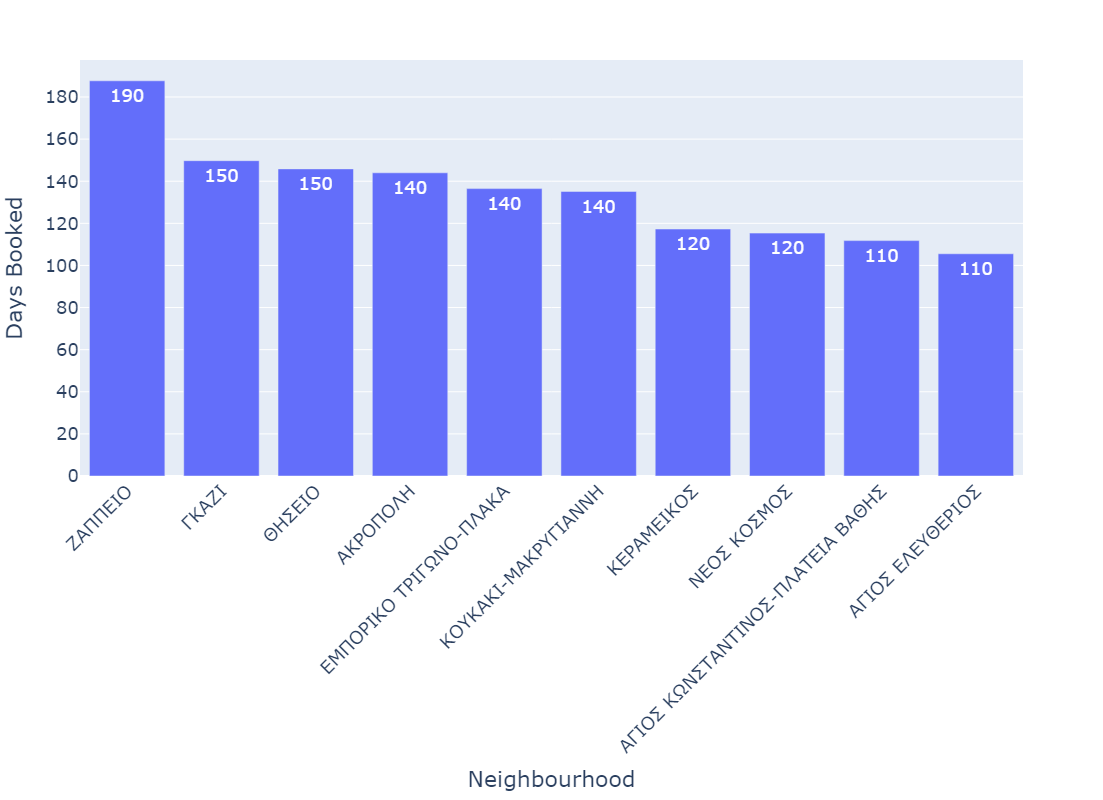

In [56]:
figao = px.bar(dfgb.sort_values(by = 'totaldaysbooked',ascending = False).head(10).reset_index(), y='totaldaysbooked', x='neighbourhood_cleansed', text_auto='.2s',
               width = 800,height = 800)
figao.update_layout(xaxis_tickangle=-45)
figao.update_layout(yaxis_title="Days Booked",xaxis_title='Neighbourhood',font=dict(
        size=18))
figao.show()

Most Profitable listings in Athens

In [57]:
dfc['id'] = dfc['id'].astype(str)
dfc.sort_values('2023income',ascending = False).head(5)[['id','2023income']]

id  2023income
6515  793412505271667780    256410.0
6298  749344207329455252    243810.0
4545            29078588    204768.0
6289  607138758123919501    196812.0
6203            19047757    190800.0

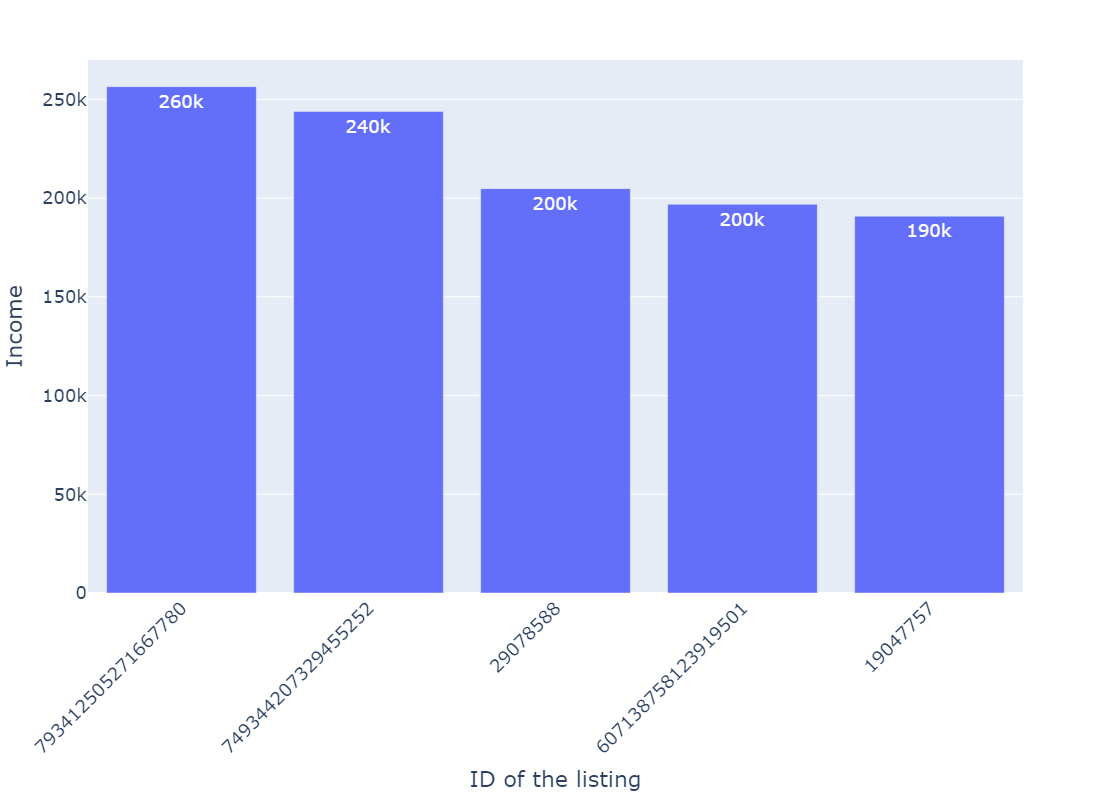

In [58]:
figpl = px.bar(dfc.sort_values('2023income',ascending = False).head(5)[['id','2023income']], y='2023income', x='id', text_auto='.2s',
               width = 800,height = 800)
figpl.update_layout(xaxis_tickangle=-45)
figpl.update_layout(yaxis_title="Income",xaxis_title='ID of the listing',font=dict(
        size=18))
figpl.show()

Most profitable neighbourhouds in Athens

In [59]:
dfc.groupby('neighbourhood_cleansed')['2023income'].sum().sort_values(ascending = False).head(10).reset_index()

neighbourhood_cleansed  2023income
0            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  19312020.0
1               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  10653834.0
2                       ΝΕΟΣ ΚΟΣΜΟΣ   5831928.0
3                          ΑΚΡΟΠΟΛΗ   4443306.0
4                            ΘΗΣΕΙΟ   3813534.0
5          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ   3702804.0
6  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ   3088638.0
7                           ΖΑΠΠΕΙΟ   2654100.0
8                        ΚΕΡΑΜΕΙΚΟΣ   2585310.0
9                          ΚΟΛΩΝΑΚΙ   2419446.0

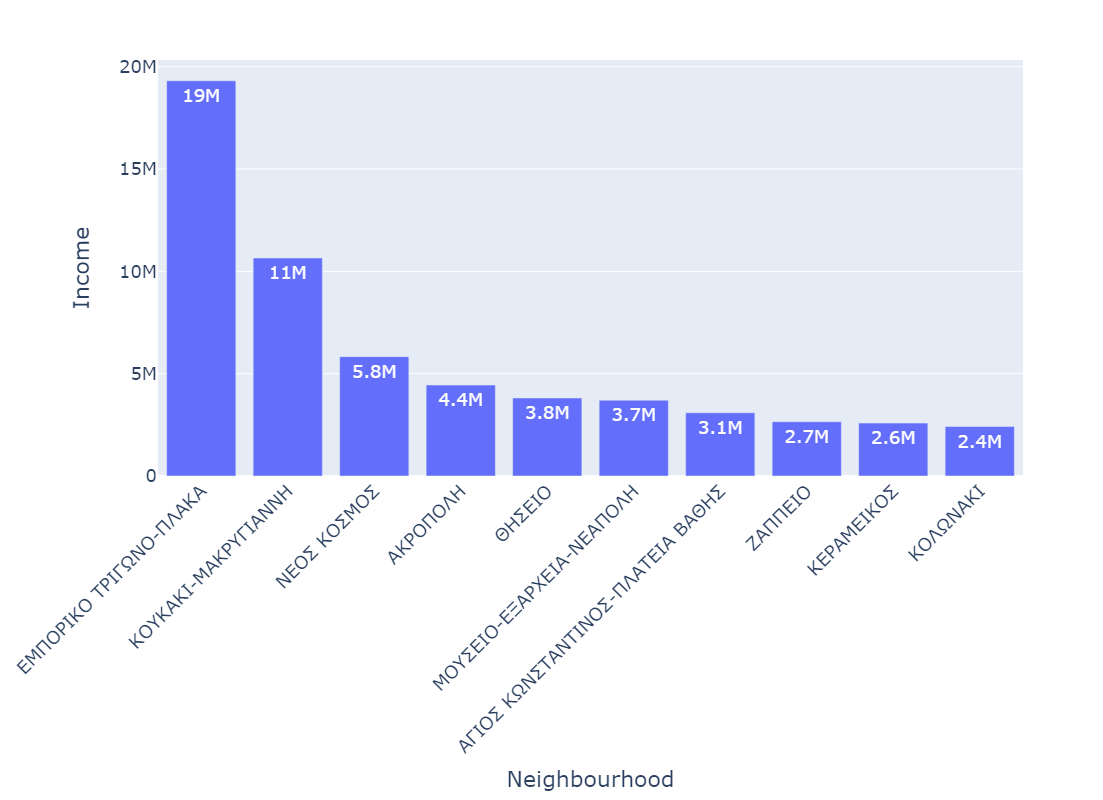

In [60]:
figpn = px.bar(dfc.groupby('neighbourhood_cleansed')['2023income'].sum().sort_values(ascending = False).head(10).reset_index(), y='2023income', x='neighbourhood_cleansed', text_auto='.2s',
               width = 800,height = 800)
figpn.update_layout(xaxis_tickangle=-45)
figpn.update_layout(yaxis_title="Income",xaxis_title='Neighbourhood',font=dict(
        size=18))
figpn.show()

In [61]:
FONT = "https://use.fontawesome.com/releases/v5.10.2/css/all.css"

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP, FONT])

app.layout = html.Div([
    html.H1('Athens Listings'),
    html.H3('Histogram (Listings on Price Per Person)'),
    dcc.Graph(id= 'g1', figure = figlist),
    html.Div([
        html.Div([
            html.H3('Top Neighbourhoods in Average price per person in $'),
            dcc.Graph(id='g2', figure=figtop)
            ], className="six columns"),
        html.Div([
            html.H3('Bottom Neighbourhoods in Average price per person in $'),
            dcc.Graph(id='g3', figure=figbot)
            ], className="six columns"),
        ], className="row"),
    html.H3('Top Neighbourhoods by Price (Good Rating vs "Bad Rating")'),
    dcc.Graph(id= 'g4', figure = figv),
    html.H3('Most Expensive Appartments in most expensive neighbourhoods'),
    dash_table.DataTable(dftotalmax.to_dict('records'), [{"name": i, "id": i} for i in dftotalmax.columns],
                        style_data={
                        'whiteSpace': 'normal',
                        'height': 'auto',
                        'width': 150
                        },
                        style_as_list_view=True,
                        fill_width=False,
                        style_cell_conditional=[{'textAlign': 'center'}],
                        style_header={'backgroundColor': 'white',
                                        'fontWeight': 'bold'}
                        ),
    dcc.Graph(id= 'g5', figure = figgauge),
    dbc.Container(dbc.Row(dbc.Col([card2], md=5))),
    html.H3('Most Profitable Neighbourhoods in $'),
    dcc.Graph(id= 'g6', figure = figpn),
    html.H3('Most Profitable Listings in $'),
    dcc.Graph(id= 'g7', figure = figpl),
    html.H3('Average Occupancy of Listings per Neighbourhood'),
    dcc.Graph(id= 'g8', figure = figao),
  
])

if __name__ == "__main__":
    app.run_server(debug=True)

## Listings per Neighbourhood

In [62]:
dfwp = dfc.dropna(subset = 'price')

For the dash plot we will use the rating score but we want first to normalize it by giving an important role in number of reviews

In [63]:
dfwp["weighted_score"] = dfwp["review_scores_rating"] * dfwp["number_of_reviews"]
dfwp["normalized_weighted_score"] = (dfwp["weighted_score"] - dfwp["weighted_score"].min())/((dfwp["weighted_score"].max() - dfwp["weighted_score"].min())) * 100


In [64]:
dfwp

id                                      listing_url  \
0     653274914834812593  https://www.airbnb.com/rooms/653274914834812593   
1               54361219            https://www.airbnb.com/rooms/54361219   
2               51258073            https://www.airbnb.com/rooms/51258073   
3     986232372259000220  https://www.airbnb.com/rooms/986232372259000220   
4               52818014            https://www.airbnb.com/rooms/52818014   
...                  ...                                              ...   
8394  617120700737664001  https://www.airbnb.com/rooms/617120700737664001   
8395  997675237222665135  https://www.airbnb.com/rooms/997675237222665135   
8396            21695325            https://www.airbnb.com/rooms/21695325   
8397  736573771699647347  https://www.airbnb.com/rooms/736573771699647347   
8398              502879              https://www.airbnb.com/rooms/502879   

                                                   name  \
0     Condo in Athina · ★5.0 · 1 bedroom · 2 beds · ...   
1     Rental unit in Athina · ★4.75 · 1 bedroom · 1 ...   
2     Rental unit in Athina · ★5.0 · Studio · 3 beds...   
3     Rental unit in Athina · ★5.0 · 1 bedroom · 1 b...   
4     Condo in Athina · ★4.77 · 1 bedroom · 3 beds ·...   
...                                                 ...   
8394  Condo in Athina · ★4.83 · 2 bedrooms · 3 beds ...   
8395  Rental unit in Athina · ★5.0 · 1 bedroom · 2 b...   
8396  Loft in Athens · ★4.73 · 1 bedroom · 1 bed · 1...   
8397  Condo in Athina · ★5.0 · 1 bedroom · 1 bed · 1...   
8398  Rental unit in Athens · ★4.78 · 1 bedroom · 2 ...   

                                  neighborhood_overview    host_id  \
0     Η γειτονιά βρίσκεται μια ανάσα από τον Παρθενώ...  272702874   
1                                                   NaN  433120301   
2                                                   NaN  199937958   
3     An upcoming neighborhood full with cafeterias ...  220064887   
4                                                   NaN  427611455   
...                                                 ...        ...   
8394  You will be staying in the heart of the city c...   22873922   
8395  The apartement is next to Monastiraki square. ...  540907689   
8396  Syntagma is perhaps the most typical meeting p...   41042574   
8397  This is a lovely neighborhood right in the cen...  443865000   
8398  This apartment is located in Psirri, minutes w...    1418201   

                  host_name  host_since  host_listings_count  \
0                    Costas  2019-07-01                    1   
1                  Iordanka  2021-11-23                    1   
2                      Nick  2018-07-04                    3   
3                Alexandros  2018-10-11                    7   
4       Ourania And Giorgos  2021-10-16                    2   
...                     ...         ...                  ...   
8394       Livin Apartments  2014-10-23                   10   
8395             Athanasios  2023-10-08                    1   
8396           Konstantinos  2015-08-10                   10   
8397                    Sis  2022-02-06                    2   
8398  D & Y Boutique Athens  2011-11-17                   51   

      host_total_listings_count  neighbourhood_cleansed  ...  \
0                             1     ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ  ...   
1                             1  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...   
2                             3  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...   
3                             7                 ΠΑΤΗΣΙΑ  ...   
4                             2                ΠΑΓΚΡΑΤΙ  ...   
...                         ...                     ...  ...   
8394                         10  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...   
8395                          1  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...   
8396                         14  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...   
8397                          2  ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  ...   
8398                         85              ΚΕΡΑΜΕΙΚΟΣ  ...   

      num

In [65]:
dfwp.sort_values('normalized_weighted_score',ascending = False).head(10)[['id','listing_url','price','normalized_weighted_score']]

id                            listing_url  price  \
7517   1177492   https://www.airbnb.com/rooms/1177492   37.0   
4589   3431705   https://www.airbnb.com/rooms/3431705   91.0   
219   14583913  https://www.airbnb.com/rooms/14583913   49.0   
1003  16278854  https://www.airbnb.com/rooms/16278854   47.0   
7241  16263103  https://www.airbnb.com/rooms/16263103   46.0   
3352   5732674   https://www.airbnb.com/rooms/5732674   94.0   
2476  13409388  https://www.airbnb.com/rooms/13409388  105.0   
5380  14676028  https://www.airbnb.com/rooms/14676028   69.0   
1394   1484797   https://www.airbnb.com/rooms/1484797   75.0   
4500  20264807  https://www.airbnb.com/rooms/20264807   67.0   

      normalized_weighted_score  
7517                 100.000000  
4589                  99.911136  
219                   87.600447  
1003                  80.733956  
7241                  78.660869  
3352                  78.563452  
2476                  75.691781  
5380                  72.133438  
1394                  70.153729  
4500                  69.228028

In [66]:
dfwptop = dfwp.sort_values('normalized_weighted_score',ascending = False).head(10)[['id','listing_url','price','normalized_weighted_score']]

In [67]:
dfwp.groupby('neighbourhood_cleansed')[['id']].count().sort_values('id',ascending = False).head(5).reset_index()

neighbourhood_cleansed    id
0            ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ  1512
1               ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ   745
2                       ΝΕΟΣ ΚΟΣΜΟΣ   669
3          ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ   613
4  ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ   538

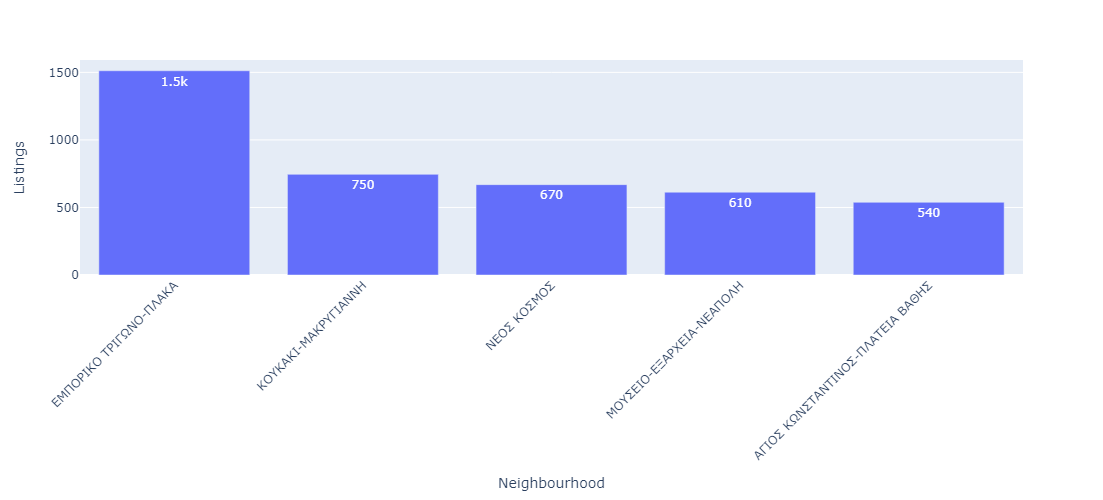

In [68]:
fign1 = px.bar(dfwp.groupby('neighbourhood_cleansed')[['id']].count().sort_values('id',ascending = False).head(5).reset_index(), 
               y='id', 
               x='neighbourhood_cleansed', 
               text_auto='.2s',
               width = 800,
               height = 500)
fign1.update_layout(xaxis_tickangle=-45)
fign1.update_layout(yaxis_title="Listings",xaxis_title='Neighbourhood')
fign1.show()

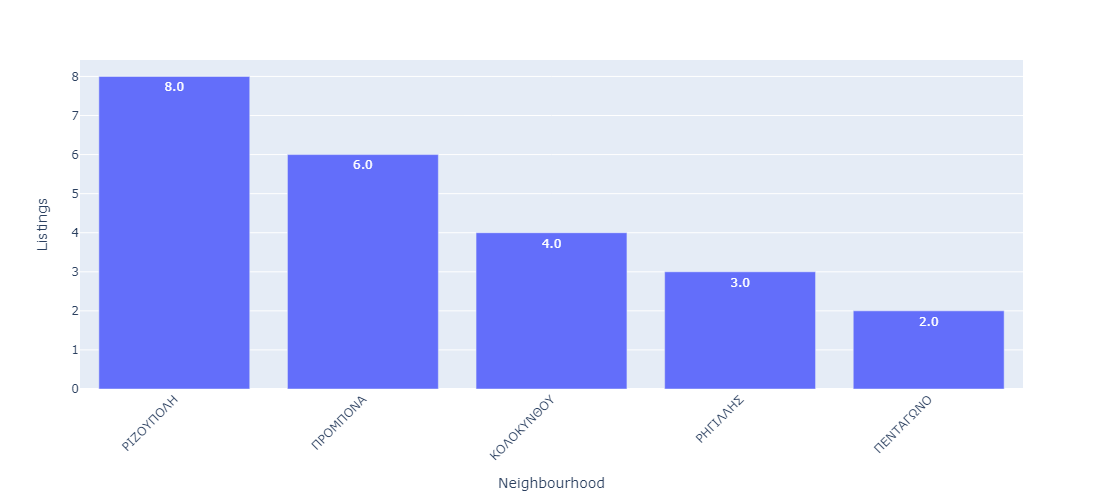

In [69]:
fign2 = px.bar(dfwp.groupby('neighbourhood_cleansed')[['id']].count().sort_values('id').head(5).reset_index().sort_values('id',ascending = False), 
               y='id', 
               x='neighbourhood_cleansed', 
               text_auto='.2s',
               width = 800,
               height = 500)
fign2.update_layout(xaxis_tickangle=-45)
fign2.update_layout(yaxis_title="Listings",xaxis_title='Neighbourhood')
fign2.show()

In [70]:
dfwp.groupby('neighbourhood_cleansed')[['review_scores_rating']].mean().sort_values('review_scores_rating',ascending = False).head(10)

review_scores_rating
neighbourhood_cleansed                      
ΡΗΓΙΛΛΗΣ                            4.923333
ΠΟΛΥΓΩΝΟ                            4.898824
ΚΟΛΩΝΟΣ                             4.837463
ΖΑΠΠΕΙΟ                             4.836061
ΝΕΑ ΚΥΨΕΛΗ                          4.831500
ΠΕΤΡΑΛΩΝΑ                           4.829264
ΓΚΑΖΙ                               4.816533
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                      4.804412
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 4.796416
ΑΜΠΕΛΟΚΗΠΟΙ                         4.795229

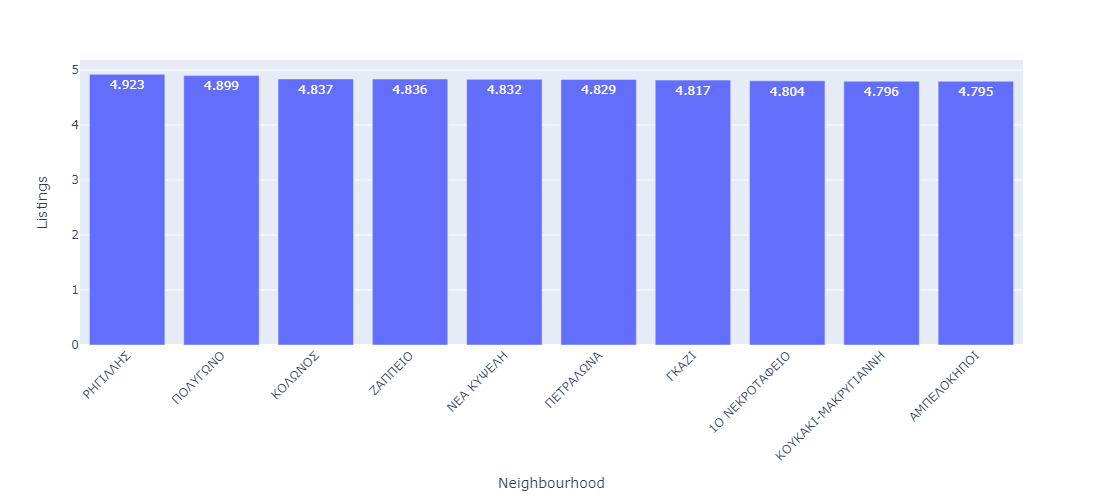

In [71]:
fign3 = px.bar(dfwp.groupby('neighbourhood_cleansed')[['review_scores_rating']].mean().sort_values('review_scores_rating',ascending = False).head(10).reset_index(), 
               y='review_scores_rating', 
               x='neighbourhood_cleansed', 
               text_auto='.4s',
               width = 800,
               height = 500)
fign3.update_layout(xaxis_tickangle=-45)
fign3.update_layout(yaxis_title="Listings",xaxis_title='Neighbourhood')
fign3.show()

In [72]:
map1 = folium.Map(location=[37.97919, 23.74532], zoom_start=13)

for idx, row in dfwp.iterrows():
    folium.Marker([row['latitude'], row['longitude']], 
           popup=row['property_type']
          ).add_to(map1)

map1
map1.save('map1.html')

In [73]:
dfwp.columns

Index(['id', 'listing_url', 'name', 'neighborhood_overview', 'host_id',
       'host_name', 'host_since', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'beds',
       'price', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_value',
       'license', 'calculated_host_listings_count', 'priceperbed',
       'totaldaysbooked', '2023income', 'weighted_score',
       'normalized_weighted_score'],
      dtype='object')

In [74]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

In [75]:
app = Dash(external_stylesheets=external_stylesheets)

def plot_map(df):
    map1 = folium.Map(location=[37.97919, 23.74532], zoom_start=13)
    for idx, row in df.iterrows():
        folium.Marker([row['latitude'], row['longitude']], 
           popup=row['listing_url']
          ).add_to(map1)
    src_doc = map1.get_root().render()
    return src_doc

app.layout = html.Div([
    html.H1('Athens Listings per price range and rating'),
    html.H5('Select the number of people that will stay'),
    dcc.Dropdown(dfwp['accommodates'].unique(), value= 2, id= 'dropdown'),
    html.H5('Select the price Range'),
    dcc.RangeSlider(min = 0, 
                    max = 1500, 
                    step = 10, 
                    value=[80, 120], 
                    id='my-range-slider',
                    marks = {i:str(i) for i in range(0,1500,50)}),
    html.H3('Neighbourhoods with the most listings'),
    dcc.Graph(id= 'g1', figure = {}),
    html.H3('Neighbourhoods with the best average rating'),
    dcc.Graph(id= 'g2', figure = {}),
    html.H3('BEST Rating Listings'),
    html.Div(id='tbl'),
    html.H3('MAP'),
    html.Div(id='g4')
])

        
@app.callback([Output('g1', 'figure'),
              Output('g2', 'figure'),
              Output('tbl', 'children'),
              Output('g4', 'children')],
              [Input('my-range-slider', 'value'),
              Input('dropdown','value')]
             )

def yearandreg(x,y):
    dfwptemp = dfwp[(dfwp['price']>x[0])&(dfwp['price']< x[1])&(dfwp['accommodates']==y)]
    dfwptoptemp = dfwptemp.sort_values('normalized_weighted_score',ascending = False).head(10)[['id','listing_url','price','normalized_weighted_score']]
    # dft_temp = dft[(dft['Year'] == x)&(dft['Regionname']==y)]
    
    fign1 = px.bar(dfwptemp.groupby('neighbourhood_cleansed')[['id']].count().sort_values('id',ascending = False).head(5).reset_index(), 
               y='id', 
               x='neighbourhood_cleansed', 
               text_auto='.2s',
               labels={'id':'Number of Listings','neighbourhood_cleansed':'Neighbourhood'},
               width = 800,
               height = 500)

    
    fign3 = px.bar(dfwptemp.groupby('neighbourhood_cleansed')[['review_scores_rating']].mean().sort_values('review_scores_rating',ascending = False).head(10).reset_index(), 
                   y='review_scores_rating', 
                   x='neighbourhood_cleansed', 
                   text_auto='.4s',
                   labels={'review_scores_rating':'Average Review Rating','neighbourhood_cleansed':'Neighbourhood'},
                   width = 800,
                   height = 500)

    dg = dash_table.DataTable(dfwptoptemp.to_dict("rows"), 
                         [{"name": i, "id": i} for i in dfwptoptemp.columns],
                        style_data={
                        'whiteSpace': 'normal',
                        'height': 'auto',
                        'width': 150
                        },
                        style_as_list_view=True,
                        fill_width=False,
                        style_cell_conditional=[{'textAlign': 'center'}],
                        style_header={'backgroundColor': 'white',
                                        'fontWeight': 'bold'}
                        )
    
    return fign1, fign3, html.Div([dg]), html.Iframe(srcDoc=plot_map(dfwptemp), style={'width': '800px', 'height': '500px'})

app.run(host='localhost', port= 8082, debug=True, jupyter_mode="inline")

## Reviews

In [76]:
df1 = pd.read_csv('reviews.csv.gz')

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\2344793718.py:64: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [77]:
df1

listing_id                   id        date  reviewer_id  \
0                     10595               271535  2011-05-20       189305   
1                     10595              1994237  2012-08-15       289831   
2                     10595              4678609  2013-05-20      2635427   
3                     10595             12502994  2014-05-04      2422327   
4                     10595             19482948  2014-09-13      6737784   
...                     ...                  ...         ...          ...   
652120  1027501913924137512  1033154620423406499  2023-11-26    442112152   
652121  1027501913924137512  1043378550797123889  2023-12-10    217198405   
652122  1028286259867636458  1031058218696915023  2023-11-23    547510518   
652123  1028286259867636458  1031789747353084273  2023-11-24     49441506   
652124  1028286259867636458  1049117914747560452  2023-12-18    384853177   

       reviewer_name                                           comments  
0             Pamela  The apartment was wonderful, fully equiped, be...  
1             Andrey  Emmanouil was an excellent host. He provided u...  
2              Ahmet  Manos is a very good host, he is kind and help...  
3               Hema  Our stay in Emmanouil home was comfortable, qu...  
4            Mariana  Fantastic accommodation very well located to v...  
...              ...                                                ...  
652120  Κωνσταντίνος  Τρομερός χώρος σε πολύ προσιτή τιμή στο κέντρο...  
652121        Eirini  Το κατάλυμα βρίσκεται σε ιδανική περιοχή, πραγ...  
652122   Charalampos  This is the most premium  AirBnb type property...  
652123        Spyros  An excellent well decorated apartment, in a gr...  
652124        Fotini  Excellent hospitality, very kind and responsiv...  

[652125 rows x 6 columns]

In [78]:
dftemp = dfwp[['id','review_scores_rating','normalized_weighted_score']]

In [79]:
dftemp.rename({'id':'listing_id'},axis = 1,inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\1152338459.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
dftemp['listing_id'] = pd.to_numeric(dftemp['listing_id'], errors='coerce')

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\3137989819.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
df1 = pd.merge(df1,dftemp,on = 'listing_id',how = 'left')

In [82]:
df1

listing_id                   id        date  reviewer_id  \
0                     10595               271535  2011-05-20       189305   
1                     10595              1994237  2012-08-15       289831   
2                     10595              4678609  2013-05-20      2635427   
3                     10595             12502994  2014-05-04      2422327   
4                     10595             19482948  2014-09-13      6737784   
...                     ...                  ...         ...          ...   
652120  1027501913924137512  1033154620423406499  2023-11-26    442112152   
652121  1027501913924137512  1043378550797123889  2023-12-10    217198405   
652122  1028286259867636458  1031058218696915023  2023-11-23    547510518   
652123  1028286259867636458  1031789747353084273  2023-11-24     49441506   
652124  1028286259867636458  1049117914747560452  2023-12-18    384853177   

       reviewer_name                                           comments  \
0             Pamela  The apartment was wonderful, fully equiped, be...   
1             Andrey  Emmanouil was an excellent host. He provided u...   
2              Ahmet  Manos is a very good host, he is kind and help...   
3               Hema  Our stay in Emmanouil home was comfortable, qu...   
4            Mariana  Fantastic accommodation very well located to v...   
...              ...                                                ...   
652120  Κωνσταντίνος  Τρομερός χώρος σε πολύ προσιτή τιμή στο κέντρο...   
652121        Eirini  Το κατάλυμα βρίσκεται σε ιδανική περιοχή, πραγ...   
652122   Charalampos  This is the most premium  AirBnb type property...   
652123        Spyros  An excellent well decorated apartment, in a gr...   
652124        Fotini  Excellent hospitality, very kind and responsiv...   

        review_scores_rating  normalized_weighted_score  
0                       4.84                   5.151234  
1                       4.84                   5.151234  
2                       4.84                   5.151234  
3                       4.84                   5.151234  
4                       4.84                   5.151234  
...                      ...                        ...  
652120                  5.00                   0.332644  
652121                  5.00                   0.332644  
652122                  5.00                   0.332644  
652123                  5.00                   0.332644  
652124                  5.00                   0.332644  

[652125 rows x 8 columns]

<AxesSubplot: >

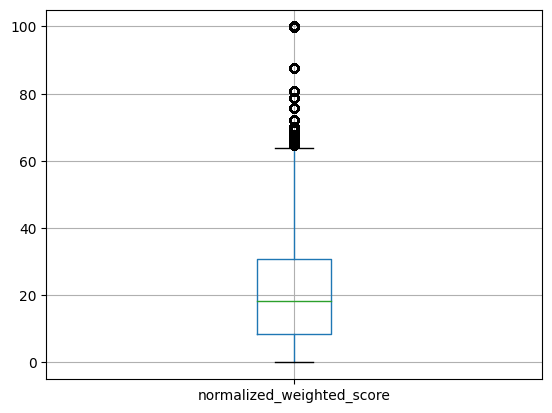

In [83]:
df1.boxplot('normalized_weighted_score')

Lets assume that listings with Normalized Weighted Score > 50 are the ones with the GOOD RATING

In [84]:
dfgr = df1[df1['normalized_weighted_score']>50]

And that the listings with Normalized Weighted Score < 50 are the ones with the BAD RATING

In [85]:
dfgr['comments']

3123      Great location for seeing the main tourist sit...
3124      My Stay at Rio's studio was just perfect.  He ...
3125      We stayed two days and didn't feel like leavin...
3126       Great experience ! This studio rent by Rio is...
3127      We stayed only one night in rio `s studio. The...
                                ...                        
493460    This place was better then the pictures could ...
493461    Υπέροχος χωρος, πεντακάθαρος, μινιμαλ διακόσμη...
493462                  Πόλη καλή τοποθεσία. Εξαιρετική θέα
493463    Absolutely incredible place! The view is insan...
493464                               it’s great i loved it!
Name: comments, Length: 38264, dtype: object

In [86]:
dfgr['comments'] = dfgr['comments'].astype(str)

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\836724966.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
dfgr['comments'] = list(map(lambda x: x.split(),dfgr['comments']))

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\2096777743.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
def string (lst):
    for i in range(len(lst)):
        lst[i] = lst[i].lower()
        lst[i] = re.sub(r'[^\w]', '', lst[i])
    return(lst)

In [89]:
dfgr['comments'] = dfgr['comments'].apply(string)

C:\Users\USER\AppData\Local\Temp\ipykernel_11672\3263737848.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
dicgr = {}
for i in tqdm(dfgr['comments']):
    for j in i:
        if j in dicgr.keys():
            dicgr[j] += 1
        else:
            dicgr.update({j:1})

100%|██████████████████████████████████████████████████████████████████████████████████████| 38264/38264 [00:00<00:00, 61372.12it/s]


In [91]:
dicgr = dict(sorted(dicgr.items(),key = lambda x:x[1],reverse = True))

In [92]:
dicgr

{'the': 77575,
 'and': 66461,
 'to': 41267,
 'a': 40872,
 'was': 30174,
 'is': 28445,
 'in': 25982,
 'very': 21117,
 'we': 20343,
 'of': 19811,
 'for': 17190,
 'great': 16389,
 'apartment': 15823,
 'place': 13775,
 'with': 13259,
 'stay': 12690,
 'it': 12163,
 'location': 12051,
 '': 11607,
 'you': 11439,
 'i': 10734,
 'athens': 10700,
 'us': 10365,
 'our': 8592,
 'from': 8169,
 'this': 7876,
 'clean': 7706,
 'at': 7463,
 'everything': 7258,
 'host': 7202,
 'had': 6752,
 'all': 6636,
 'were': 6463,
 'nice': 6424,
 'recommend': 6391,
 'perfect': 6254,
 'acropolis': 6166,
 'as': 6051,
 'on': 6017,
 'would': 5905,
 'de': 5738,
 'but': 5662,
 'so': 5580,
 'view': 5435,
 'there': 5037,
 'amazing': 4920,
 'that': 4881,
 'really': 4872,
 'are': 4730,
 'good': 4688,
 'restaurants': 4520,
 'close': 4455,
 'an': 4383,
 'et': 4294,
 'helpful': 4191,
 'well': 4174,
 'walk': 4085,
 'also': 3937,
 'again': 3831,
 'he': 3794,
 'have': 3625,
 'la': 3591,
 'easy': 3575,
 'comfortable': 3541,
 'très': 3

In [93]:
lstword = ['location','clean','acropolis','restaurants','helpful','walk','comfortable','metro','balcony','airport','quiet','plaka','neighborhood','responsive','communication','friendly','view']

In [94]:
dicword = {k:v for k,v in dicgr.items() if k in lstword}

In [95]:
dicword

{'location': 12051,
 'clean': 7706,
 'acropolis': 6166,
 'view': 5435,
 'restaurants': 4520,
 'helpful': 4191,
 'walk': 4085,
 'comfortable': 3541,
 'metro': 3176,
 'balcony': 2435,
 'communication': 2240,
 'airport': 2219,
 'quiet': 1906,
 'friendly': 1785,
 'plaka': 1768,
 'neighborhood': 1633,
 'responsive': 1354}

In [96]:
dfword = pd.DataFrame(dicword,index = ['Counts'])

In [97]:
dfword = dfword.T.reset_index()

In [98]:
dfword

index  Counts
0        location   12051
1           clean    7706
2       acropolis    6166
3            view    5435
4     restaurants    4520
5         helpful    4191
6            walk    4085
7     comfortable    3541
8           metro    3176
9         balcony    2435
10  communication    2240
11        airport    2219
12          quiet    1906
13       friendly    1785
14          plaka    1768
15   neighborhood    1633
16     responsive    1354

In [99]:
app = Dash(__name__,external_stylesheets=[dbc.themes.LUX])
app.layout = html.Div([
    dbc.Row([
        dbc.Col([
            dbc.Card([
                dbc.CardBody([
                    html.H5('Word Cloud',className='text-center'),
                    html.Img(id="image_wc"),
                ])
            ])
        ],width={'size':12,"offset":0,'order':1},style={'padding-left' : 25,'padding-right' : 25},className='text-center'),
    ])
])
    
def plot_wordcloud(data):
    d = {a: x for a, x in data.values}
    wc = WordCloud(background_color='white', width=1080, height=600)
    wc.fit_words(d)
    return wc.to_image()

@app.callback(Output('image_wc', 'src'), [Input('image_wc', 'id')])
def make_image(b):
    img = BytesIO()
    plot_wordcloud(dfword).save(img, format='PNG')
    return 'data:image/png;base64,{}'.format(base64.b64encode(img.getvalue()).decode())
   
if __name__ == "__main__":
    app.run_server(debug=False)